# arbol de clasificacion con dataset wine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

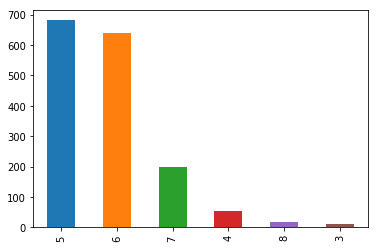

In [4]:
pd.Series(data.quality).value_counts().plot('bar')
pd.Series(data.quality).value_counts()

# modelo de arbol de clasificacion

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
columnasPredictoras = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
columnaObjetivo = ["quality"]

In [8]:
X = data[columnasPredictoras]
Y = data[columnaObjetivo]

In [9]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_split=20, random_state=99) ##random_state es simplemente para colocar una semilla de simulacion.
tree.fit(X,Y) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [10]:
data["arbol_prediccion"]= tree.predict(data[columnasPredictoras])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,arbol_prediccion
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,4
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,5


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [12]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits= 10, shuffle=True, random_state=1)
    score = np.mean(cross_val_score(tree,X,Y,scoring="accuracy", cv=cv, n_jobs=1))
    print("score para i = ",i, "es de ",score)

score para i =  1 es de  0.5528459119496855
score para i =  2 es de  0.5528459119496855
score para i =  3 es de  0.5528537735849056
score para i =  4 es de  0.5684787735849057
score para i =  5 es de  0.5753616352201257
score para i =  6 es de  0.596627358490566
score para i =  7 es de  0.5866234276729559
score para i =  8 es de  0.5810377358490566
score para i =  9 es de  0.5872798742138364
score para i =  10 es de  0.5979048742138365


5    744
6    684
7    133
4     33
3      5
Name: arbol_prediccion, dtype: int64

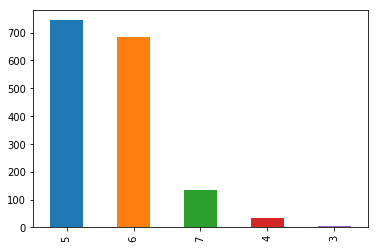

In [13]:
pd.Series(data.arbol_prediccion).value_counts().plot('bar')
pd.Series(data.arbol_prediccion).value_counts()

# modelo de Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest = RandomForestClassifier(n_jobs=1, oob_score=True, n_estimators=400)
forest.fit(X,Y)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
forest.oob_score_ ## el score del bosque

0.7217010631644778

In [17]:
data["forest_prediccion"] = forest.predict(data[columnasPredictoras])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,arbol_prediccion,forest_prediccion
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,5,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,5,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,6,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,5,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,4,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,5,5


5    681
6    638
7    199
4     53
8     18
3     10
Name: forest_prediccion, dtype: int64

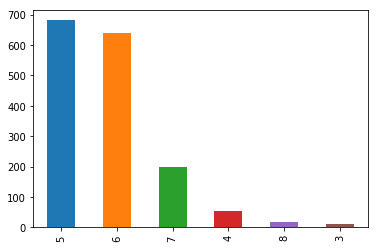

In [18]:
pd.Series(data.forest_prediccion).value_counts().plot('bar')
pd.Series(data.forest_prediccion).value_counts()

In [19]:
## los pesos para las columnas predictoras del bosque
list(zip(columnasPredictoras, forest.feature_importances_))

[('fixed acidity', 0.07627932266467766),
 ('volatile acidity', 0.10404190483711064),
 ('citric acid', 0.07558928157958436),
 ('residual sugar', 0.07136235372693575),
 ('chlorides', 0.07912338873160861),
 ('free sulfur dioxide', 0.06536008018087695),
 ('total sulfur dioxide', 0.10422313320824703),
 ('density', 0.09285884319902035),
 ('pH', 0.07516985201583251),
 ('sulphates', 0.10922700896602221),
 ('alcohol', 0.1467648308900837)]